# Table of Contents
1. Import libraries
2. Import data
3. Charts from exercise
4. Task

# 1.0 Import Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2.0 Import Data

In [5]:
# Define project folder path
path = r'/Users/sharnti/Desktop/CareerFoundry/Data Immersion/Achievement 4/Instacart Basket Analysis'

In [6]:
# Import orders_products_combined dataframe
cust_ords_prods_combined= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'custs_ords_prods_combined.pkl'))

In [7]:
# View rows, columns
cust_ords_prods_combined.shape

(32404859, 34)

In [8]:
# View sample of import to check it worked
cust_ords_prods_combined.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,num_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


# 3.0 Charts from Exercise

## 3.1 Creating bar charts

<Axes: xlabel='orders_day_of_week'>

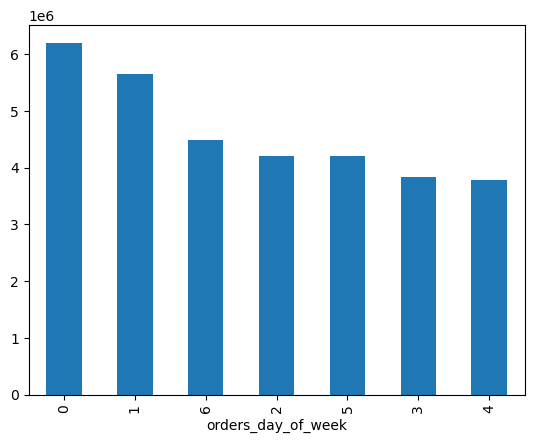

In [11]:
# Create a bar chart
cust_ords_prods_combined['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

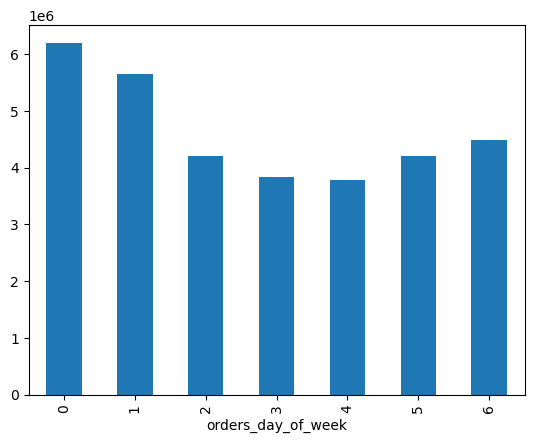

In [12]:
# Create a bar chart with sort index
cust_ords_prods_combined['orders_day_of_week'].value_counts().sort_index().plot.bar()

The sorting of your bar charts via an index can also be applied to frequencies.

In [14]:
# Create a frequency table
cust_ords_prods_combined['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [15]:
# Create a frequency table WITH a sort index
cust_ords_prods_combined['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

Sorting by an index is useful when your data would be better understood in its original order. For example, for days of the week or months of the year.

<Axes: xlabel='orders_day_of_week'>

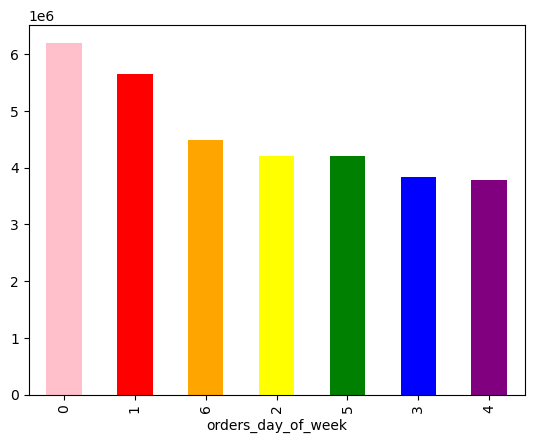

In [17]:
# Create a bar chart with colours
cust_ords_prods_combined['orders_day_of_week'].value_counts().plot.bar(color = ['pink','red','orange','yellow','green','blue','purple'])

## 3.2 Exporting Charts

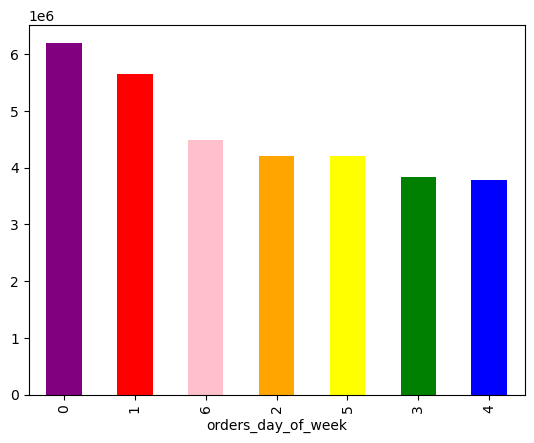

In [19]:
# Save the chart using 'bar' object.
bar = cust_ords_prods_combined['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

Now, your bar chart has been saved within the __bar__ object, and you’ll be able to access it any time you like by calling __bar.figure__. The next step is to export it outside of Jupyter in the form of an image file. This can be done via the __figure.savefig()__ function:

In [21]:
# Export chart to project folder
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## 3.3 Creating Histograms and Scatterplots

Histograms are used to show the density of a continuous variable—the distribution of observations per their occurrence in a data set. This is different from bar charts as bar charts organize observations according to some category. That’s why bar charts are good for categorical data and histograms are more appropriate for continuous data.

<Axes: ylabel='Frequency'>

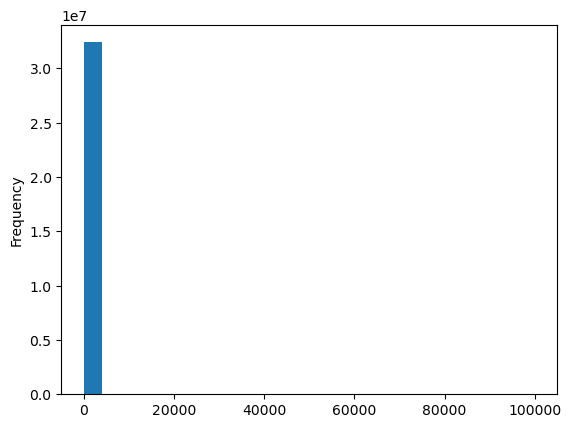

In [24]:
# Create a histogram of the prices column
cust_ords_prods_combined['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

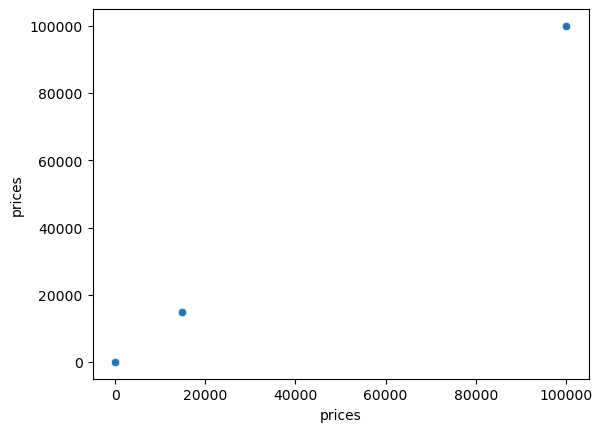

In [25]:
# Create a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = cust_ords_prods_combined)

In [26]:
# Check for price outliers (where price is greater than 100).
cust_ords_prods_combined.loc[cust_ords_prods_combined['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,num_dependants,fam_status,income,_merge
1576,912404,17,12,2,14,5.0,False,21553,5,0,...,Barbara,Chang,Female,Kansas,39,9/16/2018,3,married,150659,both
1638,603376,17,22,6,16,4.0,False,21553,3,1,...,Barbara,Chang,Female,Kansas,39,9/16/2018,3,married,150659,both
16522,3264360,135,2,2,21,13.0,False,21553,6,0,...,nan,Chen,Female,Maryland,30,3/19/2017,3,married,120635,both
16528,892534,135,3,0,8,12.0,False,21553,3,1,...,nan,Chen,Female,Maryland,30,3/19/2017,3,married,120635,both
53672,229704,342,8,1,19,30.0,False,21553,9,0,...,Ruby,Bates,Female,Minnesota,56,8/23/2018,2,married,187328,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,False,21553,17,1,...,Jeremy,Vang,Male,Kentucky,62,10/2/2017,0,divorced/widowed,302526,both
32347717,2504315,205818,3,5,15,3.0,False,21553,13,0,...,James,Hunter,Male,Maryland,60,7/12/2019,1,married,172539,both
32347727,1108388,205818,5,4,5,1.0,False,21553,5,1,...,James,Hunter,Male,Maryland,60,7/12/2019,1,married,172539,both
32380527,1916142,206049,1,2,17,NaN,True,21553,2,0,...,Louise,Leal,Female,District of Columbia,23,4/26/2019,1,married,169022,both


In [27]:
# Assign missing values to the above outliers
cust_ords_prods_combined.loc[cust_ords_prods_combined['prices'] >100, 'prices'] = np.nan

<Axes: ylabel='Frequency'>

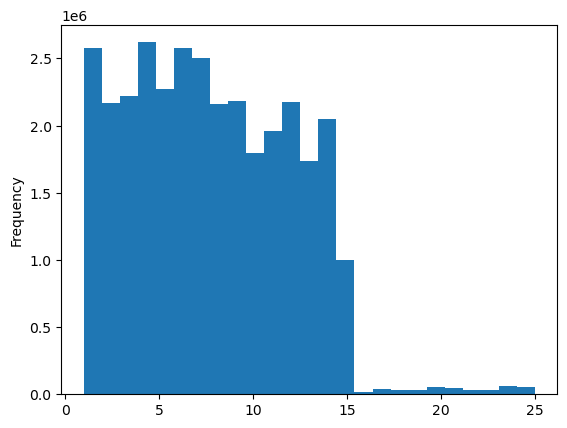

In [28]:
# Create a histogram of the prices column
cust_ords_prods_combined['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

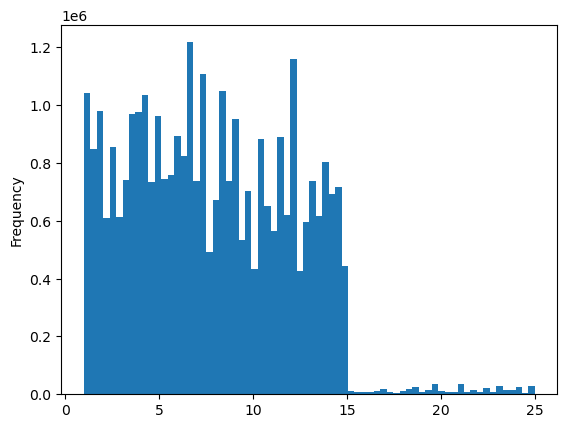

In [29]:
# Create a histogram of the prices column with increased granularity (i.e. more bins)
cust_ords_prods_combined['prices'].plot.hist(bins = 70)

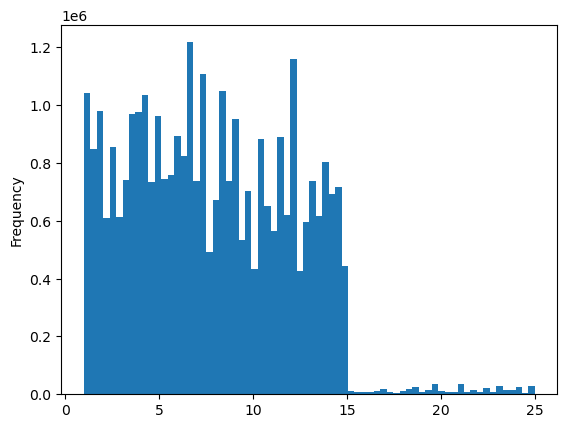

In [30]:
# Save as an object
hist = cust_ords_prods_combined['prices'].plot.hist(bins = 70)

In [31]:
# Export chart to project folder
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_bins_70.png'))

## 3.3 Creating Line Charts

Line charts are traditionally used to visualize the development of a characteristic over time. Since you don’t have dates that could indicate a timeline in your Instacart data, you won’t be able to test this out on your project just yet. You could, however, test out a different type of line chart, such as the development of the “prices” column across the days of the week. To achieve this, you’d plot the “orders_day_of_week” column on the x-axis and the “prices” column on the y-axis.

There is, however, one major caveat: this line chart will require a great deal of computing power due to the number of unique values in the “prices” column. As such, you’re likely to get a memory error and/or have your browser crash (if you have a machine with less than 16GB RAM maybe keep in mind that attempting this will cost you time to reset and start over). To avoid this, you can use the subsetting method you should be familiar with by now. For example, you might consider only plotting the top or bottom 2,000,000 rows of your dataframe:

__df = ords_prods_merge[:2000000]__

But this doesn't work, as the sample is __not representative__ of the entire population. To tackle this problem, you will need to create a __sample__.

### 3.3.1 Sampling

 A sample is a representative subsection of a population.

In [36]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(cust_ords_prods_combined)) <= 0.7

1. Set the seed for the random number generator.
2. Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
3. Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
4. Store the results of the test in a new list, dev, in the form of boolean values (True and False).

In [38]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [39]:
# Store 70% of the sample in the dataframe big
big = cust_ords_prods_combined[dev]

In [40]:
# Store 30% of the sample in the dataframe small
small = cust_ords_prods_combined[~dev]

Let's check that both samples add up to the same number of rows as the original dataset to check that the above has worked.

In [42]:
# Check the length of the original dataframe
len(cust_ords_prods_combined)

32404859

In [43]:
# Check the length of the big sample and small sample combined
len(small) + len(big)

32404859

This appears to have worked as they add up to the original dataframe.

In [45]:
# Reduce small dataframe to include only target columns
df_2 = small[['orders_day_of_week','prices']]

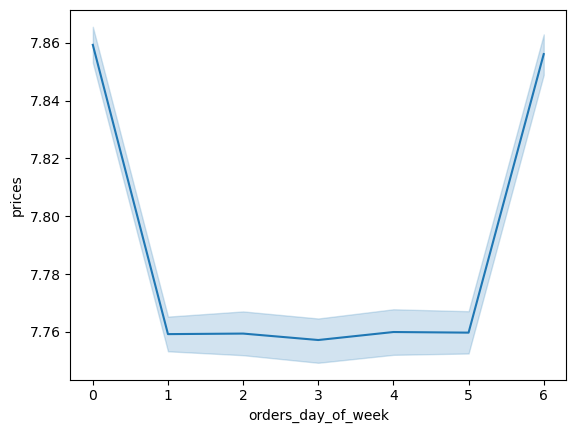

In [46]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [47]:
# Export chart to project folder
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line.png'))

# 4.0 Question from Task Part 2

## Question 3

You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

<Axes: ylabel='Frequency'>

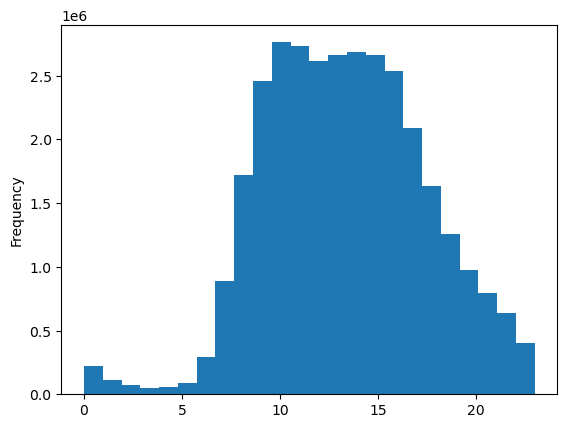

In [88]:
# Create a histogram of the prices column
cust_ords_prods_combined['order_hour_of_day'].plot.hist(bins = 24)

The histogram above shows that sales by the hour of day is normally distributed; that is to say, the majority of sale happen in the middle of the day, between the hours of 10am and 3pm.

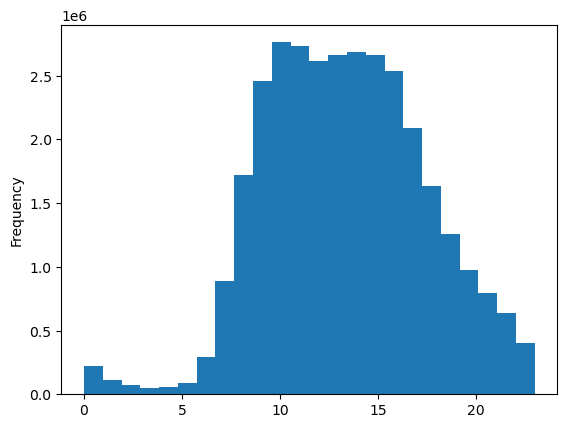

In [137]:
# Save as an object
hist_order_hour_of_day = cust_ords_prods_combined['order_hour_of_day'].plot.hist(bins = 24)

In [139]:
# Export chart to project folder
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day_bins_24.png'))

## Question 4

The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

<Axes: xlabel='loyalty_flag'>

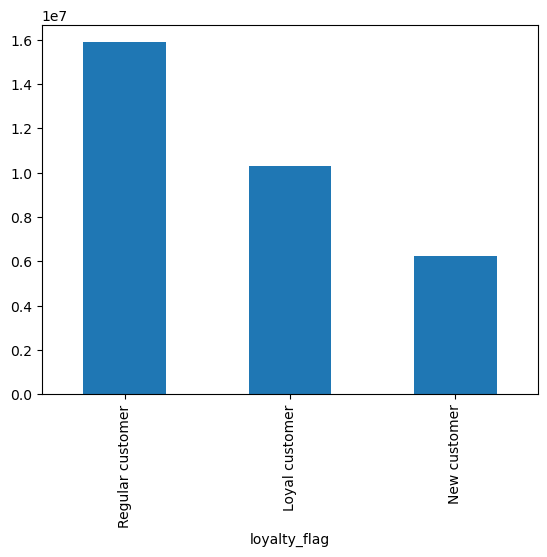

In [101]:
# Create a bar chart with sort index
cust_ords_prods_combined['loyalty_flag'].value_counts().plot.bar()

Most orders come from regular customers.

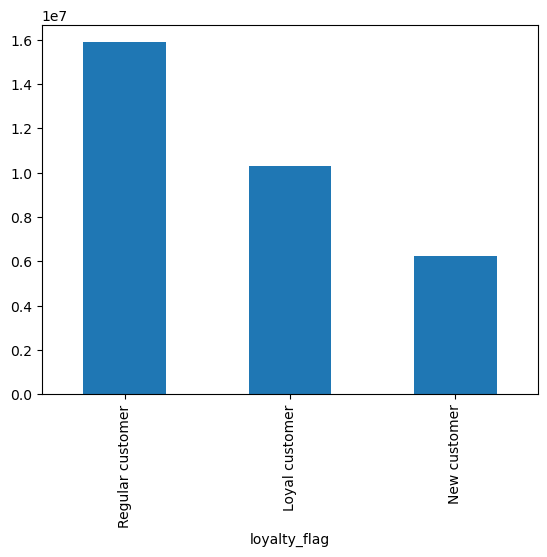

In [144]:
# Save as an object
bar_loyalty_flag = cust_ords_prods_combined['loyalty_flag'].value_counts().plot.bar()

In [146]:
# Export chart to project folder
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

## Question 5

Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [110]:
# Reduce small dataframe to include only target columns
df_3 = small[['order_hour_of_day','prices']]

In [115]:
# Check subset worked
df_3.head()

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0


<Axes: xlabel='order_hour_of_day', ylabel='prices'>

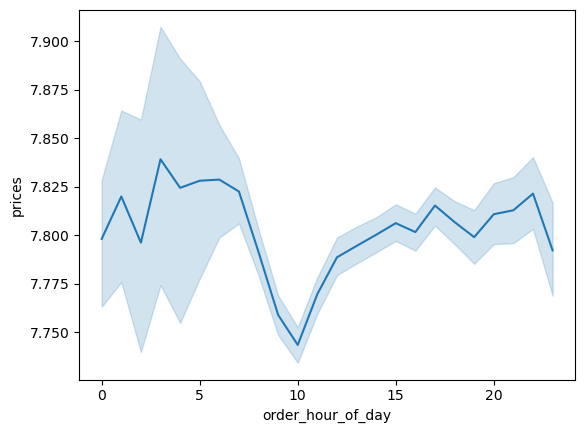

In [148]:
sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

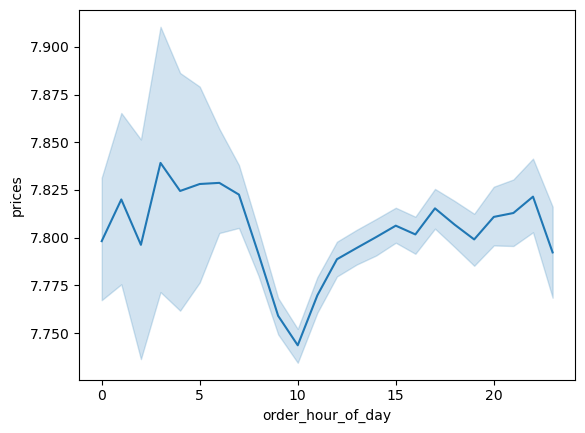

In [152]:
# Save as an object
line_order_hour_of_day_prices = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [154]:
# Export chart to project folder
line_order_hour_of_day_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour_of_day_prices.png'))

## Question 6

Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents (in a markdown cell beneath your line chart, describe what the line chart shows).

In [124]:
# Reduce small dataframe to include only target columns
df_4 = small[['age','num_dependants']]

In [126]:
# Check the above worked
df_4.head()

,age,num_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


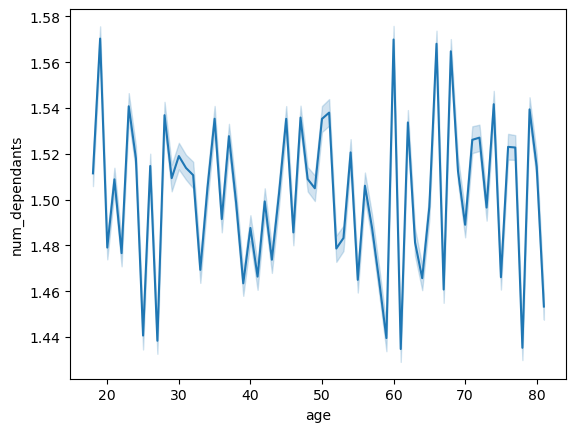

In [156]:
line_age_num_dependants = sns.lineplot(data = df_4, x = 'age',y = 'num_dependants')

There is no clear relationship between the number of dependants and age.

In [158]:
# Export chart to project folder
line_age_num_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_num_dependants.png'))

## Question 7

You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function (in a markdown cell beneath your scatterplot, describe what the scatterplot shows).

<Axes: xlabel='age', ylabel='income'>

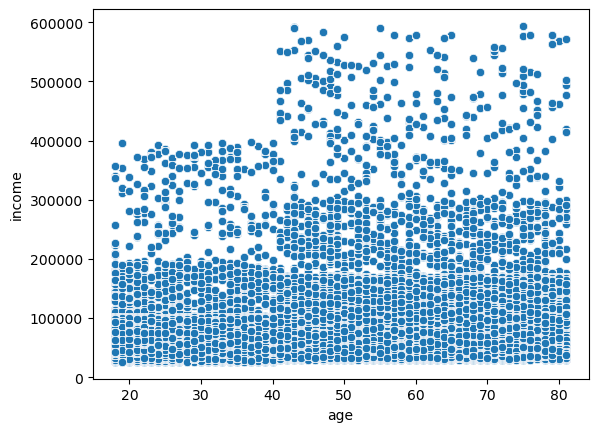

In [141]:
# Create a scatterplot
sns.scatterplot(x = 'age', y = 'income',data = cust_ords_prods_combined)

Across all age groups, there are a large number of users with an income < 200,000. In those aged under 40, income peaks around 400,000. For those over 50, income peaks around 600,000. After the age of 40, the income-span with a high-density increased from 0-200,000 to 0-300,000.

All of this suggested that income increase with age.

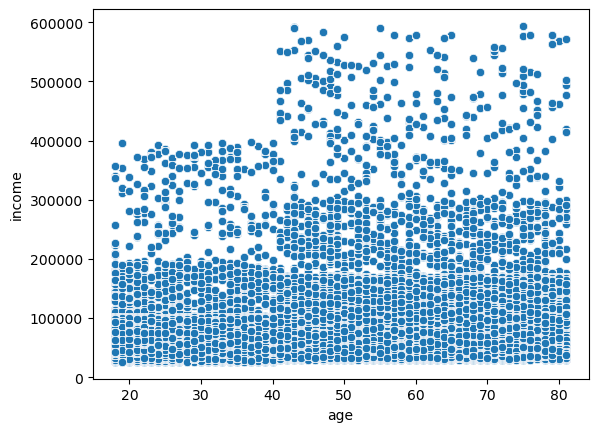

In [160]:
# Create an object of scatterplot
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income',data = cust_ords_prods_combined)

In [162]:
# Export chart to project folder
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))